In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns; sns.set(style ='white', color_codes = True)

In [21]:
df = pd.read_csv('college_players.csv', index_col = 0)

### Cleaning

In [22]:
df

,name,height,weight,position,games_played,games_started,min_per,field_goal,field_attmps,field_pct,...,free_attmps,free_pct,assists,steals,blocks,points,off_reb,def_reb,total_reb,turnovers
0,Menghe a'Nyam,6-5,215,Forward,41,19,13.3,0.9,2.1,0.414,...,1.2,0.529,0.1,0.4,0.3,2.4,1.3,1.7,3.0,1.0
1,Jordan Aaberg,6-9,225,Forward,115,16,11.2,1.5,2.3,0.619,...,0.7,0.788,0.2,0.2,0.8,3.5,0.7,1.6,2.3,0.6
2,Karl Aaker,6-5,210,Forward,92,29,16.4,1.4,4.0,0.346,...,0.6,0.611,0.6,0.4,0.2,4.1,0.6,1.4,2.0,0.8
3,Mike Aaman,6-8,210,Forward,107,55,19.0,3.1,6.5,0.473,...,2.8,0.641,0.4,0.5,0.7,7.9,2.5,3.2,5.7,1.2
4,Carlton Aaron,6-9,322,Center,86,72,24.5,4.3,7.8,0.544,...,4.1,0.482,0.3,0.6,0.6,10.5,3.1,4.3,7.3,1.5


In [23]:
df.isna().sum()

name             0
height           0
weight           0
position         0
games_played     0
games_started    0
min_per          0
field_goal       0
field_attmps     0
field_pct        0
two_pointer      0
two_pattamps     0
two_pct          0
three_ptrs       0
three_pattmp     0
three_pct        0
free_throws      0
free_attmps      0
free_pct         0
assists          0
steals           0
blocks           0
points           0
off_reb          0
def_reb          0
total_reb        0
turnovers        0
dtype: int64

In [24]:
df.shape

(5, 27)

In [8]:
#drop columns that account > ~ 10% NaN values
# df.drop(columns=[''],  inplace=True)

In [ ]:
#drop rows with NaN values
df.dropna(inplace=True)

### Exploratory Data Analysis

In [49]:
df.head()

,name,height,weight,position,games_played,games_started,min_per,field_goal,field_attmps,field_pct,...,free_attmps,free_pct,assists,steals,blocks,points,off_reb,def_reb,total_reb,turnovers
0,Menghe a'Nyam,77,215,Forward,41,19,13.3,0.9,2.1,0.414,...,1.2,0.529,0.1,0.4,0.3,2.4,1.3,1.7,3.0,1.0
1,Jordan Aaberg,81,225,Forward,115,16,11.2,1.5,2.3,0.619,...,0.7,0.788,0.2,0.2,0.8,3.5,0.7,1.6,2.3,0.6
2,Karl Aaker,77,210,Forward,92,29,16.4,1.4,4.0,0.346,...,0.6,0.611,0.6,0.4,0.2,4.1,0.6,1.4,2.0,0.8
3,Mike Aaman,80,210,Forward,107,55,19.0,3.1,6.5,0.473,...,2.8,0.641,0.4,0.5,0.7,7.9,2.5,3.2,5.7,1.2
4,Carlton Aaron,81,322,Center,86,72,24.5,4.3,7.8,0.544,...,4.1,0.482,0.3,0.6,0.6,10.5,3.1,4.3,7.3,1.5


In [36]:
df['height'] = df['height'].str.replace('-','')

In [38]:
df['height'] = df['height'].astype('int64')

In [48]:
df['height'] = df['height'].apply(lambda x: int(str(x)[0]) * 12 + int(str(x)[1:]))

In [50]:
df.corr()

,height,weight,games_played,games_started,min_per,field_goal,field_attmps,field_pct,two_pointer,two_pattamps,...,free_attmps,free_pct,assists,steals,blocks,points,off_reb,def_reb,total_reb,turnovers
height,1.000000,0.550235,0.655580,0.485035,0.331691,0.676637,0.479036,0.912039,0.757008,0.669919,...,0.554573,0.300911,-0.202939,0.065795,0.933132,0.618312,0.510906,0.614702,0.568363,0.272414
weight,0.550235,1.000000,-0.014465,0.714490,0.748782,0.778661,0.652429,0.437372,0.765033,0.688626,...,0.774655,-0.531783,-0.138477,0.585567,0.241448,0.748557,0.688007,0.788411,0.737665,0.702661
games_played,0.655580,-0.014465,1.000000,0.184597,0.063544,0.317636,0.283200,0.491567,0.257306,0.224141,...,0.045729,0.696597,0.441283,-0.229379,0.666589,0.310446,-0.001092,0.128317,0.069909,-0.219163
games_started,0.485035,0.714490,0.184597,1.000000,0.973738,0.970769,0.990555,0.140131,0.906842,0.939915,...,0.954723,-0.541037,0.265859,0.891717,0.265010,0.985733,0.929930,0.960544,0.950889,0.910802
min_per,0.331691,0.748782,0.063544,0.973738,1.000000,0.914706,0.962598,-0.007236,0.813814,0.848091,...,0.905107,-0.666123,0.338376,0.932174,0.063608,0.939755,0.865526,0.904144,0.888643,0.909954
field_goal,0.676637,0.778661,0.317636,0.970769,0.914706,1.000000,0.958658,0.369356,0.965533,0.964600,...,0.953187,-0.390655,0.161425,0.768386,0.460752,0.995704,0.915217,0.974558,0.950752,0.841498
field_attmps,0.479036,0.652429,0.283200,0.990555,0.962598,0.958658,1.000000,0.107767,0.870812,0.910607,...,0.908765,-0.466665,0.382271,0.861245,0.265036,0.980756,0.880738,0.921682,0.907388,0.853930
field_pct,0.912039,0.437372,0.491567,0.140131,-0.007236,0.369356,0.107767,1.000000,0.514881,0.389923,...,0.288667,0.427118,-0.504444,-0.246108,0.904483,0.287619,0.249020,0.342844,0.298569,0.012579
two_pointer,0.757008,0.765033,0.257306,0.906842,0.813814,0.965533,0.870812,0.514881,1.000000,0.986223,...,0.962877,-0.342525,-0.083380,0.692453,0.593402,0.942082,0.944151,0.978950,0.967613,0.832701
two_pattamps,0.669919,0.688626,0.224141,0.939915,0.848091,0.964600,0.910607,0.389923,0.986223,1.000000,...,0.976251,-0.393611,-0.006989,0.767012,0.523915,0.953556,0.973240,0.984456,0.985624,0.876583


In [55]:
def CorrMtx(df, dropDuplicates = True):
    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()
    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
    # Set background color / chart style
    sns.set_style(style = 'white')
    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

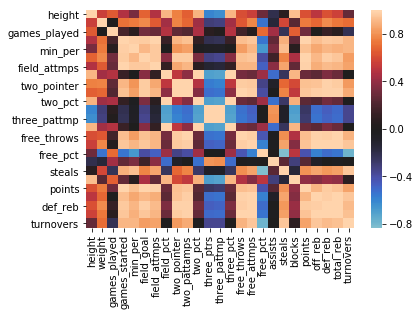

In [51]:
sns.heatmap(df.corr(), center=0)

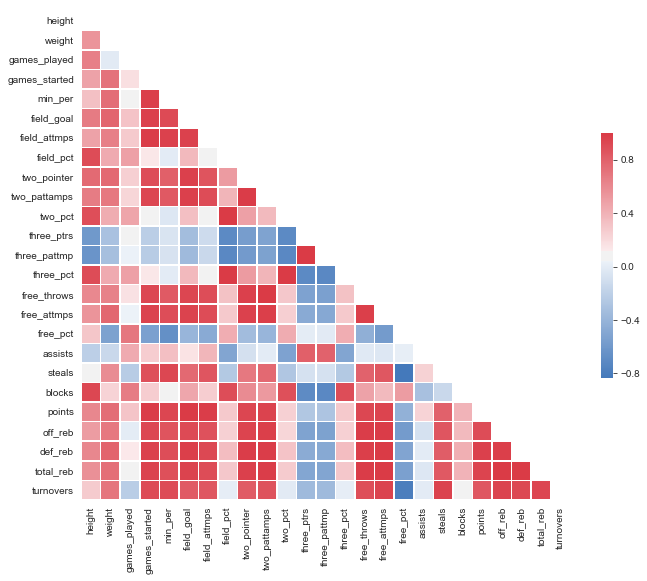

In [57]:
CorrMtx(df.corr(), dropDuplicates = True)

In [52]:
df.describe()

,height,weight,games_played,games_started,min_per,field_goal,field_attmps,field_pct,two_pointer,two_pattamps,...,free_attmps,free_pct,assists,steals,blocks,points,off_reb,def_reb,total_reb,turnovers
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,79.20000,236.400000,88.200000,38.200000,16.880000,2.240000,4.540000,0.479200,2.040000,3.960000,...,1.88000,0.610200,0.320000,0.420000,0.520000,5.680000,1.640000,2.440000,4.060000,1.020000
std,2.04939,48.242098,28.804514,24.345431,5.192976,1.417039,2.536336,0.106975,1.621111,2.975399,...,1.52217,0.117889,0.192354,0.148324,0.258844,3.397352,1.112654,1.262141,2.326585,0.349285
min,77.00000,210.000000,41.000000,16.000000,11.200000,0.900000,2.100000,0.346000,0.400000,1.200000,...,0.60000,0.482000,0.100000,0.200000,0.200000,2.400000,0.600000,1.400000,2.000000,0.600000
25%,77.00000,210.000000,86.000000,19.000000,13.300000,1.400000,2.300000,0.414000,0.900000,2.000000,...,0.70000,0.529000,0.200000,0.400000,0.300000,3.500000,0.700000,1.600000,2.300000,0.800000
50%,80.00000,215.000000,92.000000,29.000000,16.400000,1.500000,4.000000,0.473000,1.500000,2.300000,...,1.20000,0.611000,0.300000,0.400000,0.600000,4.100000,1.300000,1.700000,3.000000,1.000000
75%,81.00000,225.000000,107.000000,55.000000,19.000000,3.100000,6.500000,0.544000,3.100000,6.500000,...,2.80000,0.641000,0.400000,0.500000,0.700000,7.900000,2.500000,3.200000,5.700000,1.200000
max,81.00000,322.000000,115.000000,72.000000,24.500000,4.300000,7.800000,0.619000,4.300000,7.800000,...,4.10000,0.788000,0.600000,0.600000,0.800000,10.500000,3.100000,4.300000,7.300000,1.500000


In [67]:
def  draw_boxplots(var):
    f, ax = plt.subplots(figsize=(12, 6))
    fig = sns.boxplot(x=var, y="games_played", data=df)
    fig.axis(ymin=0, ymax=350);

In [73]:
df.name

0    Menghe a'Nyam
1    Jordan Aaberg
2       Karl Aaker
3       Mike Aaman
4    Carlton Aaron
Name: name, dtype: object

In [102]:
nba = ['Micheal Jordan','Mike Aaman','Lebron James','Karl Aaker']

In [109]:
df['drafted'] = df['name'].isin(nba).apply(lambda x: int(x))

In [122]:
position = pd.get_dummies(df['position'],prefix='position')

In [123]:
df = df.merge(position, left_index = True, right_index = True,)

In [124]:
df

,name,height,weight,position,games_played,games_started,min_per,field_goal,field_attmps,field_pct,...,steals,blocks,points,off_reb,def_reb,total_reb,turnovers,drafted,position_Center,position_Forward
0,Menghe a'Nyam,77,215,Forward,41,19,13.3,0.9,2.1,0.414,...,0.4,0.3,2.4,1.3,1.7,3.0,1.0,0,0,1
1,Jordan Aaberg,81,225,Forward,115,16,11.2,1.5,2.3,0.619,...,0.2,0.8,3.5,0.7,1.6,2.3,0.6,0,0,1
2,Karl Aaker,77,210,Forward,92,29,16.4,1.4,4.0,0.346,...,0.4,0.2,4.1,0.6,1.4,2.0,0.8,1,0,1
3,Mike Aaman,80,210,Forward,107,55,19.0,3.1,6.5,0.473,...,0.5,0.7,7.9,2.5,3.2,5.7,1.2,1,0,1
4,Carlton Aaron,81,322,Center,86,72,24.5,4.3,7.8,0.544,...,0.6,0.6,10.5,3.1,4.3,7.3,1.5,0,1,0


In [242]:
not_drafted = df[df['drafted'] == 0]
len(not_drafted)

3

In [244]:
drafted = df[df['drafted'] == 1]
len(drafted)

2

### Height and Points of Players Drafted And Not Drafted

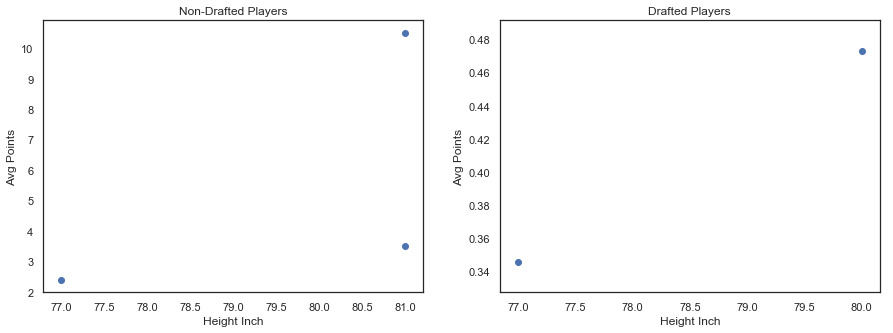

In [243]:
# Creates two subplots and unpacks the output array immediately
x_feature_n = not_drafted['height']
y_target_n = not_drafted['points']
f, (ax1, ax2) = plt.subplots(1, 2, sharey= False, figsize= (15,5))
ax2.scatter(x_feature_d, y_target_d)
ax1.scatter(x_feature_n, y_target_n)
ax1.set(xlabel='Height Inch', ylabel='Avg Points',
       title='Non-Drafted Players')
ax2.set(xlabel='Height Inch', ylabel='Avg Points',
       title='Drafted Players')
plt.show()

### Games Played and Points of Players Drafted And Not Drafted

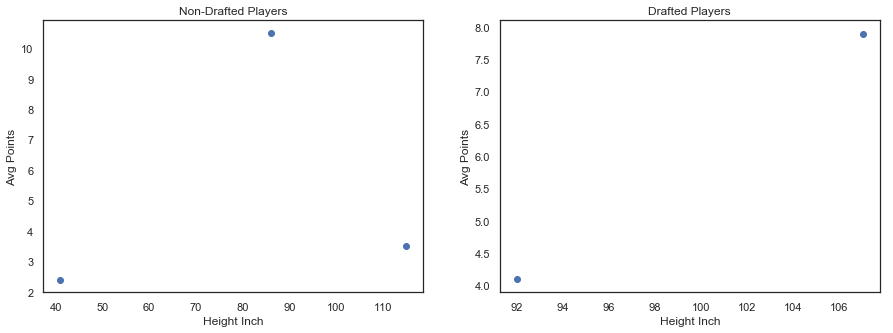

In [252]:
# Creates two subplots and unpacks the output array immediately
x_feature_gamesplayed_n = not_drafted['games_played']
y_target_gamesplayed_n = not_drafted['points']
x_feature_gamesplayed_d = drafted['games_played']
y_target_gamesplayed_d = drafted['points']
f, (ax1, ax2) = plt.subplots(1, 2, sharey= False, figsize= (15,5))
ax2.scatter(x_feature_gamesplayed_d, y_target_gamesplayed_d)
ax1.scatter(x_feature_gamesplayed_n, y_target_gamesplayed_n)
ax1.set(xlabel='Height Inch', ylabel='Avg Points',
       title='Non-Drafted Players')
ax2.set(xlabel='Height Inch', ylabel='Avg Points',
       title='Drafted Players')
plt.show()

### Weight and Points of Players Drafted And Not Drafted

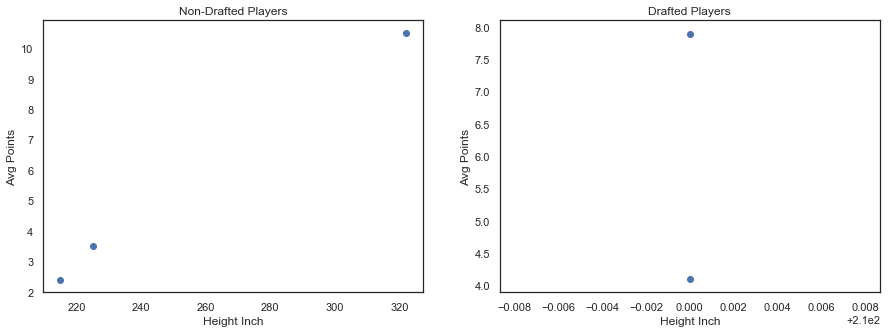

In [250]:
# Creates two subplots and unpacks the output array immediately
x_feature_weight_n = not_drafted['weight']
y_target_weight_n = not_drafted['points']
x_feature_weight_d = drafted['weight']
y_target_weight_d = drafted['points']
f, (ax1, ax2) = plt.subplots(1, 2, sharey= False, figsize= (15,5))
ax2.scatter(x_feature_weight_d, y_target_weight_d)
ax1.scatter(x_feature_weight_n, y_target_weight_n)
ax1.set(xlabel='Height Inch', ylabel='Avg Points',
       title='Non-Drafted Players')
ax2.set(xlabel='Height Inch', ylabel='Avg Points',
       title='Drafted Players')
plt.show()

### Games Started and Points of Players Drafted And Not Drafted

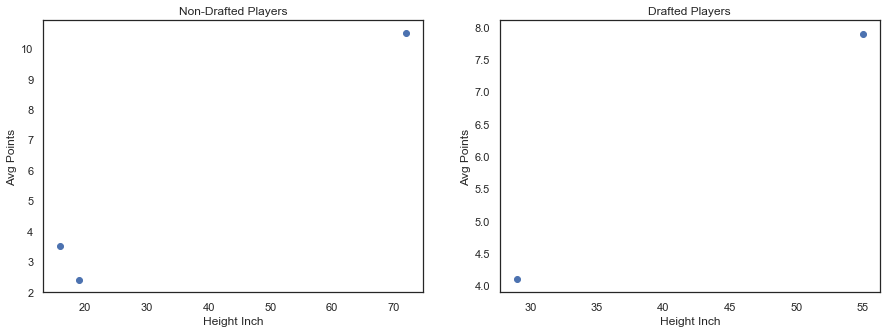

In [253]:
# Creates two subplots and unpacks the output array immediately
x_feature_gamesstarted_n = not_drafted['games_started']
y_target_gamesstarted_n = not_drafted['points']
x_feature_gamesstarted_d = drafted['games_started']
y_target_gamesstarted_d = drafted['points']
f, (ax1, ax2) = plt.subplots(1, 2, sharey= False, figsize= (15,5))
ax2.scatter(x_feature_gamesstarted_d, y_target_gamesstarted_d)
ax1.scatter(x_feature_gamesstarted_n, y_target_gamesstarted_n)
ax1.set(xlabel='Height Inch', ylabel='Avg Points',
       title='Non-Drafted Players')
ax2.set(xlabel='Height Inch', ylabel='Avg Points',
       title='Drafted Players')
plt.show()

### Confusion Matrix Function Plot

In [186]:
labels = ['Drafted', 'Not Drafted']
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    # Compute confusion matrix
    cmat = pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


### Logistic Regression

In [127]:
df.columns

Index(['name', 'height', 'weight', 'position', 'games_played', 'games_started',
       'min_per', 'field_goal', 'field_attmps', 'field_pct', 'two_pointer',
       'two_pattamps', 'two_pct', 'three_ptrs', 'three_pattmp', 'three_pct',
       'free_throws', 'free_attmps', 'free_pct', 'assists', 'steals', 'blocks',
       'points', 'off_reb', 'def_reb', 'total_reb', 'turnovers', 'drafted',
       'position_Center', 'position_Forward'],
      dtype='object')

In [151]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [137]:
log_reg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2)

In [138]:
#first model uses only pressure at 3p to predict whethter it will rain tomrorow
#can you improve it? 
X = df[['height', 'weight', 'games_played', 'games_started',
       'min_per', 'field_goal', 'field_attmps', 'field_pct', 'two_pointer',
       'two_pattamps', 'two_pct', 'three_ptrs', 'three_pattmp', 'three_pct',
       'free_throws', 'free_attmps', 'free_pct', 'assists', 'steals', 'blocks',
       'points', 'off_reb', 'def_reb', 'total_reb', 'turnovers',
       'position_Center', 'position_Forward']]
y = df['drafted']

In [146]:
# Your code here
print("Sci-kit learn's weights:", log_reg.coef_[0])
print("Our manual regression weights:", y)

Sci-kit learn's weights: [-3.04251593e-02 -1.32339924e-01  4.12747396e-01  9.36886780e-02
  2.17748414e-02  5.00769285e-03  1.65995285e-02 -6.38306020e-04
 -2.44953822e-03 -3.41703249e-03 -6.62702609e-04  6.71150797e-03
  2.00165610e-02 -6.38306020e-04 -1.70376831e-03 -3.77567364e-03
  4.71474488e-04  3.91268405e-03 -9.43123773e-05 -5.71056857e-04
  1.58113035e-02 -4.86588323e-03 -1.82628747e-03 -6.69217070e-03
 -1.76498109e-03  0.00000000e+00 -4.24550584e-04]
Our manual regression weights: 0    0
1    0
2    1
3    1
4    0
Name: drafted, dtype: int64


In [139]:
#train_test_littttttt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [168]:
#fit our model with our training data
log_reg.fit(X_train,y_train)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1e+16, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [179]:
logreg_test_pred = log_reg.predict(X_test)

In [180]:
#how well did our model predict our correct class? 
accuracy_score(y_test, logreg_test_pred)

0.5

Predicted  1  All
True             
0          2    2
All        2    2


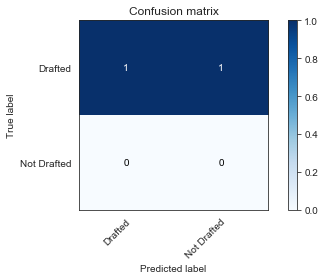

In [189]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, logreg_test_pred, classes=labels,
                      title='Confusion matrix')

plt.show()

In [ ]:
param_grid = [{'n_estimator': [3,10,30], 'max_features': [2,4,6,8]}]

In [ ]:
log_gs_training_score = np.mean(log_grid_search.cv_results_['mean_train_score'])
log_gs_testing_score = log_grid_search.score(X, y)

print("Mean Training Score:", log_gs_training_score*100)
print("Mean Testing Score:", log_gs_testing_score*100)
print("Best Parameter Found:")
log_grid_search.best_params_

### K Nearest Neighbor

In [192]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [200]:
knn = KNeighborsClassifier(n_neighbors=2)
# the n_neighbors is the parameter where you specify k

In [201]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [202]:
# predict the response for new observations
test_preds_knn = knn.predict(X_test)

In [203]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds_knn)

Precision Score: 0.0
Recall Score: 0.0
Accuracy Score: 1.0
F1 Score: 0.0


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [204]:
print(confusion_matrix(y_test, test_preds_knn, labels=None, sample_weight=None))
print(classification_report(y_test, test_preds_knn))

[[2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [206]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [ ]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_preds_knn, classes=labels,
                      title='Confusion matrix')

plt.show()

In [ ]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

## Search Optimal Value Of K for KNN

In [175]:
# search for an optimal value of K for KNN
k_range = list(range(1, 3))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.0, 0.0]


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


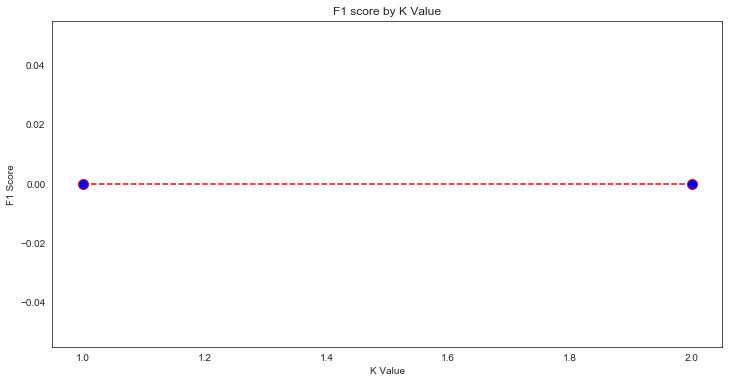

In [178]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 3), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

### Standard Scaler 

In [ ]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  


model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_scaled, y_train)

test_pred_scaled = model.predict(X_test_scaled)

In [ ]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_pred_scaled)

In [ ]:
print(confusion_matrix(y_test, test_pred_scaled, labels=None, sample_weight=None))
print(classification_report(y_test, test_pred_scaled))

In [ ]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

In [ ]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 3), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

### Decision Tree Classification (AdaBoost)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn.ensemble import AdaBoostClassifier
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error

In [ ]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
ctree=DecisionTreeClassifier(max_depth = 2)
ctree.fit(X_train,y_train)

In [ ]:
## adaboost
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2, n_estimators =200,
                                                   algorithm = "SAMME.R", learning_rate= 0.5))
ada_clf.fit(X_train, y_train)

In [ ]:
dot_data = StringIO()
export_graphviz(ctree, out_file=dot_data,  
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
clasPred = ctree.predict(X_test)

In [ ]:
# comparing the results and plot them 
accuracy_score(y_test_iris, clasPred)

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(ctree, X_iris, y_iris, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, X_iris, y_iris, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes= 16, n_jobs=-1)

In [ ]:
rnd_clf.fit(X_train, y_train)

In [ ]:
y_pred_rf = rnd_clf.predict(X_test)